该数据分析参考：
https://www.jianshu.com/p/3233a513d9da

https://zhuanlan.zhihu.com/p/71599477

项目背景：

CDNow曾是一家在线音乐零售平台，后被德国波泰尔斯曼娱乐集团收购。通过该网站给定的用户购买明细数据来分析该网站用户消费行为，辅助运营部门具有针对性营销、推广，节约成本，提升获客能力。

数据源：https://pan.baidu.com/s/1_co54-bX9Mz_e_NWV4xtOg 提取码：va7h

数据集有四个特征：用户ID，购买日期，订单数，订单金额。

对用户消费行为分析，其分析特征如下：
<img src="./images/user_question.png"/>

In [9]:
#导入常用的库
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [10]:
# 导入数据
columns = ['user_id','purchase_date','order_num','order_amount']
df = pd.read_table("./data/CDNOW_master.txt",names=columns,sep='\s+')

In [11]:
df.head()

,user_id,purchase_date,order_num,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


有些用户一天下单了两次，如2号客户。

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        69659 non-null  int64  
 1   purchase_date  69659 non-null  int64  
 2   order_num      69659 non-null  int64  
 3   order_amount   69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


1 无缺失数据(有些情况，可能某个特殊值是表示缺失数据，要与相关人员确定。)

2 对于时间字段需要转为date类型。

3 数据量为69569条。

In [13]:
df.describe()

,user_id,purchase_date,order_num,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


从user_id中可知，数据记录条数为69569条。但user_id最大值为23570，平均每人付费3次左右。根据均值可知，均值偏小，表明存在用户购买次数分布式呈现正态右偏分布的/泊松分布的。

从order_num可知，仅有少部分用户是订单数量>3的，可能存在订单数的2-8原则，呈现尾态分布。

从order_amount，可初步得出，仅有少部分用户是大单购买用户，可能存在付费的2-8原则，呈现尾态分布。

In [14]:
# 将purchase_date进行数据类型转换
df['purchase_date'] = pd.to_datetime(df['purchase_date'],format='%Y%m%d')
df['month'] = df['purchase_date'].values.astype('datetime64[M]')
df.head()

,user_id,purchase_date,order_num,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


注意，这里的month字段的天数都变成了1号。

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        69659 non-null  int64         
 1   purchase_date  69659 non-null  datetime64[ns]
 2   order_num      69659 non-null  int64         
 3   order_amount   69659 non-null  float64       
 4   month          69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


发现数据并不存在空值，当然也有可能存在某个特征取值表示空值的情况。

### 用户总体消费趋势分析

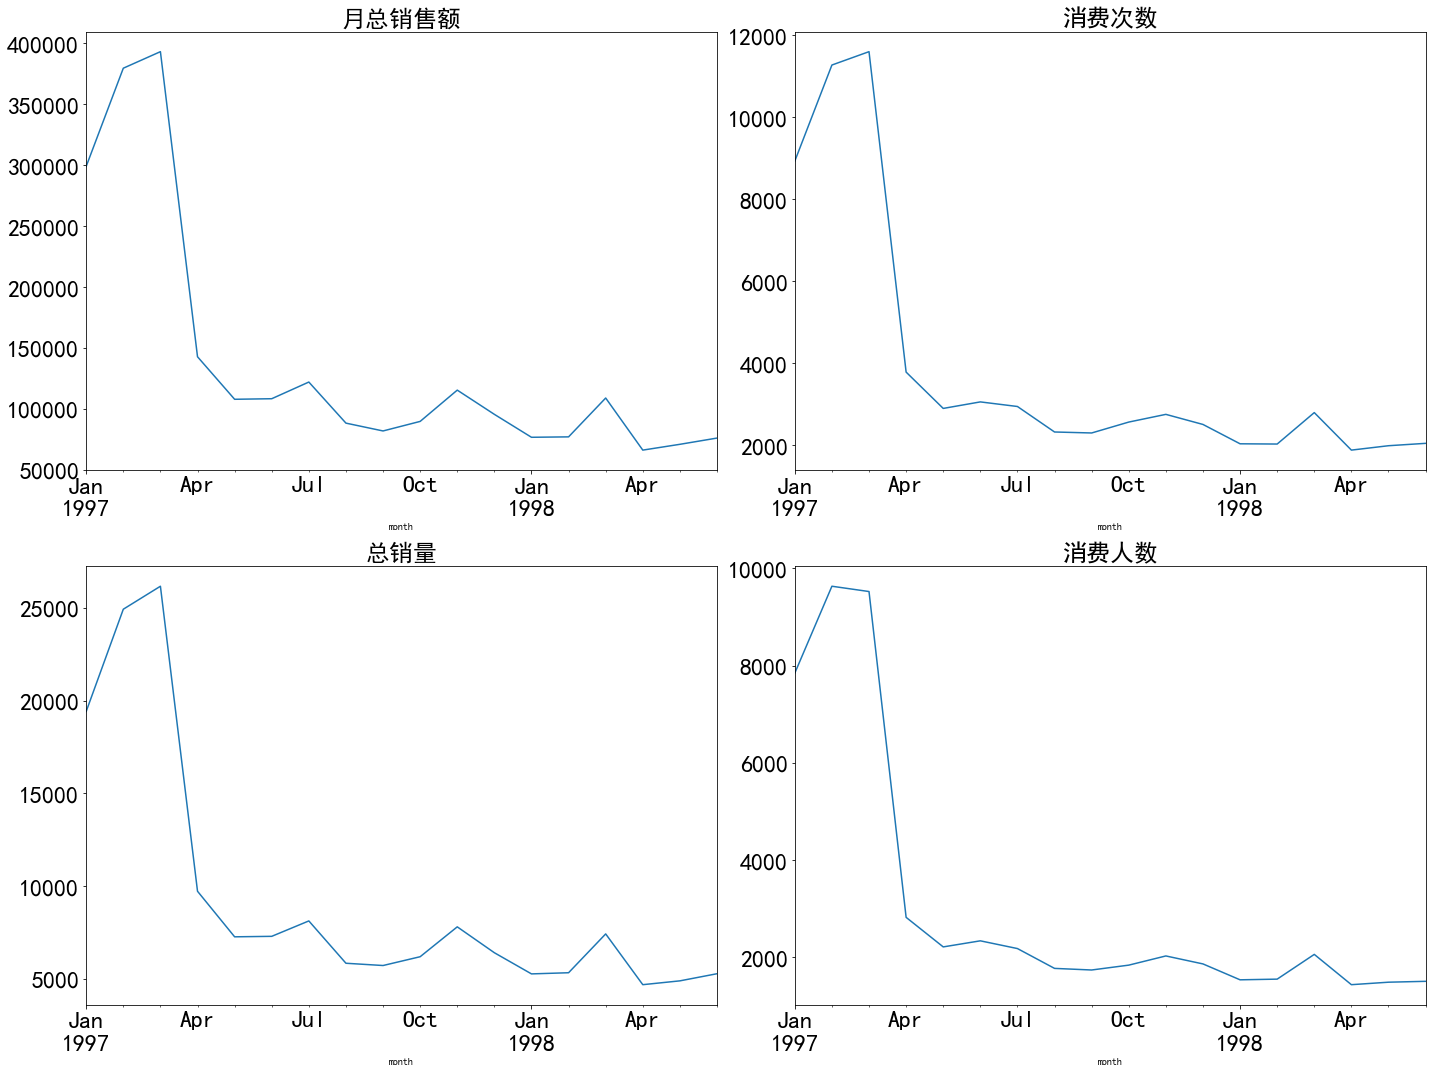

In [16]:
import warnings
warnings.filterwarnings('ignore')

#解决中文显示参数设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

plt.figure(figsize=(20,15))

# 月总销售额
plt.subplot(221)
df.groupby('month')['order_amount'].sum().plot(fontsize=24) 
plt.title('月总销售额',fontsize=24) 
 
# 月消费次数
plt.subplot(222)
df.groupby('month')['purchase_date'].count().plot(fontsize=24)
plt.title('消费次数',fontsize=24) 

#每月的销量
plt.subplot(223)
df.groupby('month')['order_num'].sum().plot(fontsize=24)
plt.title('总销量',fontsize=24)

#每月的消费人数
plt.subplot(224)
df.groupby('month')['user_id'].apply(lambda x:len(x.unique())).plot(fontsize=24)
plt.title('消费人数',fontsize=24)
plt.tight_layout() # 设置子图的间距
plt.show()

从图中可以看出：1997年一季度的销量、消费人数和消费次数特别高，从而销售总额也就特别高。但往后若干季度却剧减，同时在1998年一季度也有消费次数、人数、金额总量的上扬，但无法与同年形成比较。

为什么会出现骤减的情况呢？可以从三个角度进行假设把？1 客户中存在异常客户；2 CDNow营销策略导致的一季度的上扬；3 竞争对手出现了；这里仅有销售数据，从而仅是做假设。

另一方面，在2月到3月这段期间，可以发现消费人数稍有下降，但总销量与总销售额却依然上升，是不是说明3月份的用户中有我们需要重点发展的高价值客户呢？

### 个体用户消费分析

从5个角度分析个人消费能力

In [17]:
# 1 用户消费金额，消费次数的描述统计
df.pivot_table(values='order_num',index='user_id')

,order_num
user_id,
1,1.000000
2,3.000000
3,2.666667
4,1.750000
5,2.636364
...,...
23566,2.000000
23567,1.000000
23568,2.000000


In [18]:
# 根据用户id进行分组
group_user = df.groupby('user_id').sum()
group_user.describe()

,order_num,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


从用户的角度看，平均美味用户购买7张CD，最大购买份数为1033张。用户平均消费金额在100元左右，标准差为24，结合分位数和最大值看，平均值和75%分位接近，肯定存在高额消费用户，这也符合二八法则。

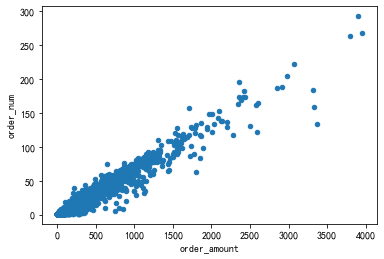

In [19]:
# 用户消费金额和消费次数的散点图
# 查询条件：订单金额 < 4000
group_user.query('order_amount<4000').plot.scatter(x='order_amount',y='order_num')

从散点图可以看出，用户并不存在异常值情况，且规律性也比较强。可能是因为商品比较单一，
金额和商品数量的关系也因此呈现线性，没几个离群点。

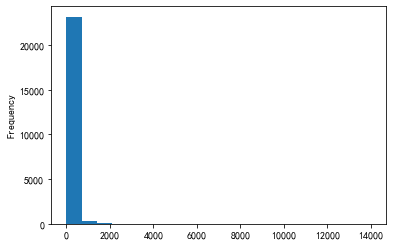

In [20]:
# 用户消费金额的分布图
group_user.order_amount.plot.hist(bins=20)

从图中可以看出，用户的消费趋势较为集中，但存在若干极大值的干扰。这里进行截断操作再进行查看

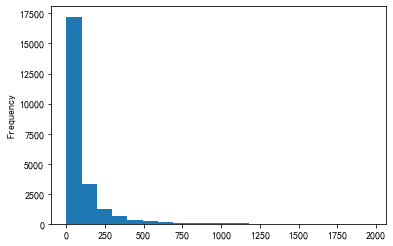

In [21]:
group_user.query('order_amount < 2000')['order_amount'].plot.hist(bins=20)

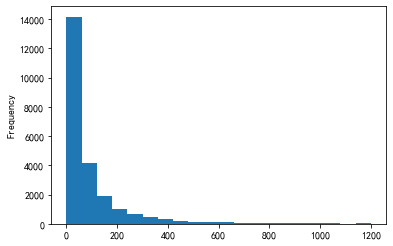

In [22]:
group_user.query('order_amount < 1200')['order_amount'].plot.hist(bins=20)

根据截断消费金额小于1200的用户，可以看到：

大部分用户的消费能力并不高，将近半数的用户消费金额不超过40元，高消费用户(>200元)不超过2000人。

从上图直方图可知，大部分用户的消费能力确实不高，绝大部分呈现较低的消费能力。高消费用户在图中几乎看不到，但这确实符合消费行业。

虽然有极端数据干扰(这是正常情况，毕竟每个行业都有壕的在买东西)，但绝大部分用户都是普罗大众。

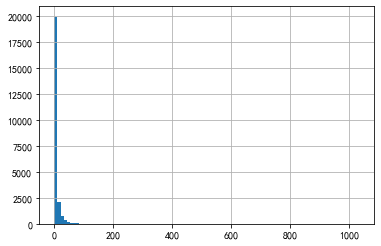

In [23]:
# 用户消费次数的分布图
group_user['order_num'].hist(bins=100)

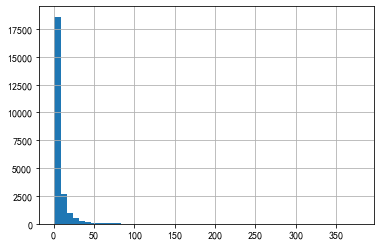

In [24]:
group_user.query('order_num < 400')['order_num'].hist(bins=50)

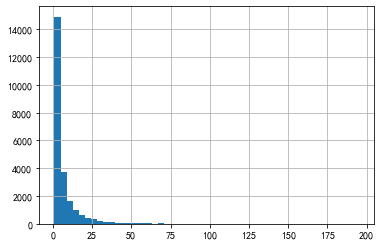

In [25]:
group_user.query('order_num < 200')['order_num'].hist(bins=50)

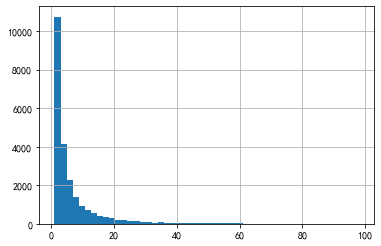

In [26]:
group_user.query('order_num < 100')['order_num'].hist(bins=50)

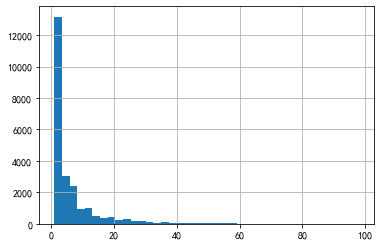

In [27]:
group_user.query('order_num < 100')['order_num'].hist(bins=40)

大部分用户购买CD的数量都是在3张以内，购买大量CD的用户数量并不多。

In [28]:
# 用户消费周期分析

# 用户购买周期(按订单)
## 用户消费周期描述

In [29]:
# 每个用户的每次购买时间间隔
order_diff = df.groupby('user_id').apply(
    lambda x:x['purchase_date']-x['purchase_date'].shift())
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: purchase_date, dtype: timedelta64[ns]

这是每个用户的每次购买时间间隔

In [30]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: purchase_date, dtype: object

平均每个用户的购买时间间隔是68天，间隔最长的是533天。想要召回用户，在60天左右的消费间隔是比较好的。

绝大部分用户的消费周期都低于100天。

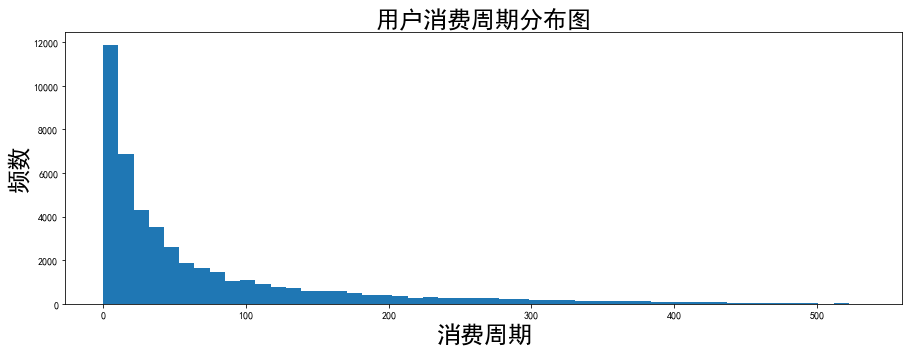

In [31]:
# 用户消费周期分布

plt.figure(figsize=(15,5))
plt.hist((order_diff / np.timedelta64(1,'D')).dropna(),bins=50)
plt.xlabel('消费周期',fontsize=24)
plt.ylabel('频数',fontsize=24)
plt.title('用户消费周期分布图',fontsize=24);

典型的（指数）长尾分布，大部分用户的消费间隔确实比较短。不妨将时间召回点设为消费后立即赠送优惠券，消费后10天询问用户礼品怎么样，消费后20天提醒优惠券到期，消费后30天短信推送。

In [32]:
# 用户生命周期（按第一次&最后一次消费）
# 用户生命周期描述

接下来计算每一位用户生命周期，这里定义第一次消费到最后一次消费为整个用户生命。

In [33]:
orderdt_min=df.groupby('user_id')['purchase_date'].min()#第一次消费
orderdt_max=df.groupby('user_id')['purchase_date'].max()#最后一次消费
(orderdt_max-orderdt_min).head()

user_id
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: purchase_date, dtype: timedelta64[ns]

In [34]:
# 计算用户的平均生命周期
(orderdt_max-orderdt_min).mean()

Timedelta('134 days 20:55:36.987696')

所有用户的平均生命周期是134天，比预想的高，但是平均数不具有代表性，接下来还是看一下分布情况。


**用户生命周期分布**

一般用户的生命周期分为以下部分：

阶段A:客户获取。发现和获取潜在客户，并通过有效渠道提供合适的价值定位以获取客户。

阶段B:客户提升。通过刺激需求的产品组合或服务组合把客户培养成高价值客户。

阶段C:客户成熟。使客户使用电信新产品，培养客户的忠诚度。

阶段D:客户衰退。建立高危客户预警机制，延长客户的生命周期。

阶段E:客户离网。该阶段主要是赢回客户。

从而这里的用户生命周期长度就是从阶段A到阶段E的长度。从下图中可知，用户的生命周期长度大多是在50天左右。而若是为了延长用户生命周期或者是防止客户流失，就应该需要对用户生命周期长度细分到每一个阶段，这样在时间上更精确的管理不同阶段的客户。

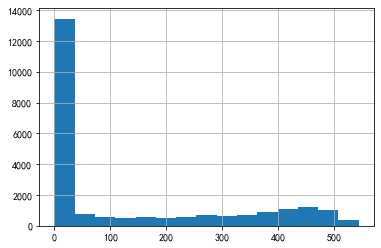

In [67]:
((orderdt_max-orderdt_min)/np.timedelta64(1,'D')).hist(bins=15)

因为数据类型是timedelta时间，无法直接作出直方图，所以先换算成数值。换算的方式直接除timedelta函数即可，np.timedelta64(1, ‘D’)，D表示天，1表示1天，作为单位使用的。因为max-min已经表示为天了，两者相除就是周期。

这里是将消费了一次以上的客户就纳入生命周期统计。但也可以统计老客户的生命周期，老客户的定义就是消费两次以上的客户。而老客户的生命周期是如何定义呢？将用户第一次购买时间与第二次购买时间相减的天数大于0作为老客户的生命周期，若天数等于0表示仅购买过一次的新客户。

而对于老客户而言，应该更加看重新客户的回流，稳固扩展市场。

In [68]:
# 计算所有消费过两次以上的老客户的生命周期
life_time = (orderdt_max - orderdt_min).reset_index()
life_time.head()

,user_id,purchase_date
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


转换成DataFrame

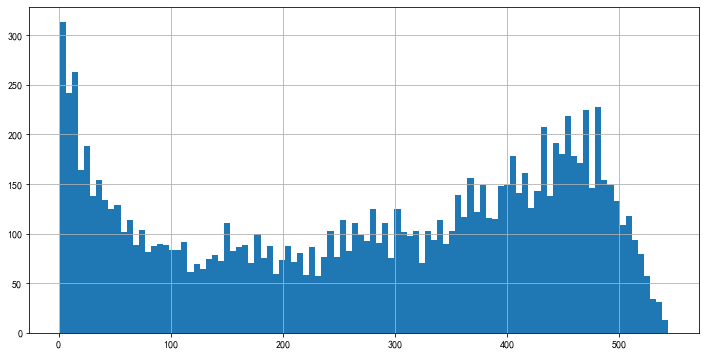

In [37]:
# 用户声明周期分布图
plt.figure(figsize=(10,5))
life_time['life_time'] = life_time['purchase_date'] / np.timedelta64(1,'D')
life_time[life_time.life_time>0]['life_time'].hist(bins=100,figsize=(12,6))

- 上图可见，用户生命周期呈现双峰趋势，20天内生命周期的用户是一个高峰，400至500天内生命周期的用户是另一个高峰。

- 根据此情况，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

分析去掉0天生命周期的用户之后的用户生命周期的平均值。

In [38]:
#去掉0天生命周期的用户之后的用户生命周期的平均值
life_time[life_time.life_time>0]['purchase_date'].mean()

Timedelta('276 days 01:04:31.344216')

用户分层

按用户价值分层 -- RFM模型

为了进行精细化运营，可以利用RFM模型对用户价值指数(衡量历史到当前用户贡献的收益)进行计算，其中
- 最近一次消费-R：客户最近一次交易时间的间隔。R值越大，表示客户交易发生的日期越久，反之则交易发生的日期越近。
- 消费频率-F：客户在最近一段时间内交易的次数。F值越大，表示客户交易频繁，反之表示客户交易不活跃。
- 消费金额-M：客户在最近一段时间内交易的金额。M值越大，表示客户价值越高，反之则表示客户价值越低。

根据上述三个维度，对客户进行细分：

<img src="./images/user_level.png" />

<img src="./images/user_dim.png" />

In [39]:
df.columns

Index(['user_id', 'purchase_date', 'order_num', 'order_amount', 'month'], dtype='object')

In [40]:
rfm = df.pivot_table(index='user_id',
                     values=['order_amount','purchase_date','order_num'],
                    aggfunc={'order_amount':'sum',
                            'purchase_date':'max',
                            'order_num':'sum'})
rfm.head()

,order_amount,order_num,purchase_date
user_id,,,
1,11.77,1,1997-01-01
2,89.00,6,1997-01-12
3,156.46,16,1998-05-28
4,100.50,7,1997-12-12
5,385.61,29,1998-01-03


In [41]:
# 日期的最大值与当前日期的差值为R
rfm['R'] = (rfm['purchase_date'].max() - rfm['purchase_date']) / np.timedelta64(1,'D')
rfm.rename(columns = {'order_amount':'M',
                     'order_num':'F'},
          inplace=True)

# 构建rfm模型公式
def get_rfm(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:(x-x.mean()) / x.std()).apply(get_rfm,axis=1)
rfm.head()
#求和
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


以上为不同层次用户的消费人数，一般挽留用户的消费人数排名第一，有14074人，重要保持客户排名第二，有4554人，与一般挽留用户差距比较大，但累计消费金额最多，业务方可以根据结果对客户分类运营，降低营销成本，提高ROI。

按用户活跃程度分层---新用户、活跃用户、不活跃用户、回流用户

- 新用户的定义是第一次消费。
- 活跃用户即老客，在某一个时间窗口内有过消费。
- 不活跃用户则是时间窗口内没有消费过的老客。
- 回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。

In [42]:
# 将用户消费数据进行数据透视：
# 用户活跃程度分层
# 将用户消费数据进行数据透视：
df1 = df.pivot_table(index = "user_id",
                     columns = "month",
                     values = 'purchase_date',
                     aggfunc = 'count').fillna(0)
df1.head() 

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


图中的数字（0，1，2）代表了当月的消费次数。

In [43]:
df2 = df1.applymap(lambda x:1 if x>0 else 0)
df2.tail()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


0代表当月没有消费，1代表有消费。

In [44]:
# （new=新、active=活跃、return=回流、unactive=流失,unreg=未注册）
# (new=1,active=2,return=3,unactive=4,unreg=0)
def active_status(data):
    status=[]
    for i in range(18): #共18个月
        
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:#前面某月消费过，是老客
                if status[i-1]==0:#前一个月不是首次消费，不是新客
                    status.append(0)#则本月也不是新客
                else:
                    status.append(4)#前一个月是首次消费，属于新客，则本月为不活跃用户
            else:
                status.append(0)#前面某月没有消费过，则本月也不是新客
         #若本月消费
        else:
            if len(status)==0:#前面没有消费过
                status.append(1)#则为新客
            else:#前面消费过
                if status[i-1] ==4:#前一个月没有消费，是不活跃用户
                    status.append(3)#本月为回流用户
                elif status[i-1]==0:#前一个月没有消费，不是新客
                    status.append(1)
                else:#前一个月是首次消费
                    status.append(2)#本月为活跃用户
    return status

In [45]:
#可得到一张不同用户在不同月份的不同状态（new=新、active=活跃、return=回流、
# unactive=流失）,unreg相当于未注册，指这个用户在这个月及以前从未购买过产品，
# 主要为了统计起来更加方便而加进去。
indexs = df['month'].sort_values().astype('str').unique()
df3 = df2.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
df3.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3,1,4,3,2,4,4,4,4,4,4,3,4,4,4,4,4,3,4
4,1,4,4,4,4,4,4,3,4,4,4,3,4,4,4,4,4,4
5,1,2,4,3,2,2,2,4,3,4,4,3,2,4,4,4,4,4


In [46]:
#把unreg替换成NaN，再用fillna(0)把空值填为0。然后转置，把月份作为索引行，
# 状态作为列，得到如下的表
df4=df3.replace(0,np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T
df4.columns = df4.columns.astype(int).map(lambda x:str(x))
df4

,1,2,3,4
1997-01-01,7846.0,0.0,0.0,0.0
1997-02-01,8476.0,1157.0,0.0,6689.0
1997-03-01,7248.0,1681.0,595.0,14046.0
1997-04-01,0.0,1773.0,1049.0,20748.0
1997-05-01,0.0,852.0,1362.0,21356.0
1997-06-01,0.0,747.0,1592.0,21231.0
1997-07-01,0.0,746.0,1434.0,21390.0
1997-08-01,0.0,604.0,1168.0,21798.0
1997-09-01,0.0,528.0,1211.0,21831.0
1997-10-01,0.0,532.0,1307.0,21731.0


从表中可以看出，新客都是集中在前3个月，回流用户整体在1000左右，而不活跃用户数量随着时间稍有上升。

In [47]:
# 作出非堆积效果图
u = df4.reset_index()
u.columns

Index(['index', '1', '2', '3', '4'], dtype='object')

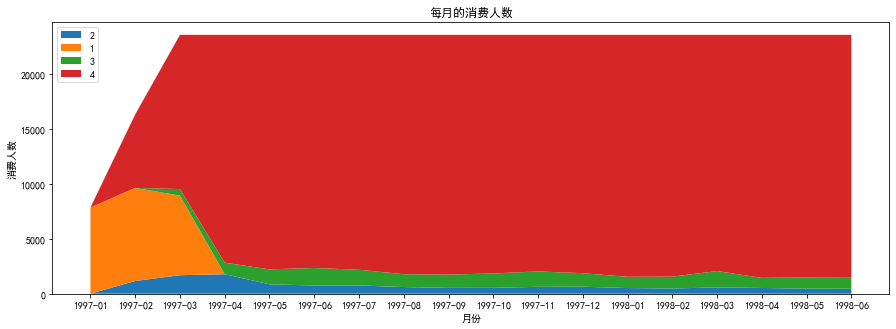

In [48]:
labels = u[['2','1','3','4']].columns
plt.figure(figsize=(15,5))
plt.stackplot(u['index'].astype(str).apply(lambda x:x[:-3]), 
              u['2'],u['1'],u['3'],u['4'], 
              labels=labels)
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月的消费人数')
plt.legend(loc='upper left')

In [49]:
df5=df4.apply(lambda x:x/x.sum(),axis=1)#每一层用户占总用户的比例
df5

,1,2,3,4
1997-01-01,1.000000,0.000000,0.000000,0.000000
1997-02-01,0.519299,0.070886,0.000000,0.409815
1997-03-01,0.307510,0.071319,0.025244,0.595927
1997-04-01,0.000000,0.075223,0.044506,0.880272
1997-05-01,0.000000,0.036148,0.057785,0.906067
1997-06-01,0.000000,0.031693,0.067543,0.900764
1997-07-01,0.000000,0.031650,0.060840,0.907510
1997-08-01,0.000000,0.025626,0.049555,0.924820
1997-09-01,0.000000,0.022401,0.051379,0.926220
1997-10-01,0.000000,0.022571,0.055452,0.921977


由上表可知，每月的用户消费状态变化：

- 新客用户：仅在前三个月，后续再无新增客户。
- 活跃用户：比例持续下降，说明持续消费的用户数量在减少，也说明运营部门的促活效果并不好。
- 回流用户：比例也稍有下降，在4%左右波动。
- 不活跃用户：比例稍有上升，流失较大。

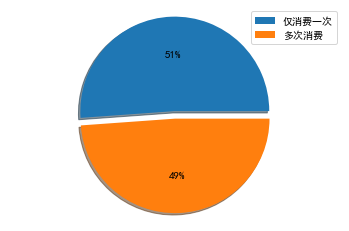

In [50]:
# 用户质量分析
# 多少用户仅消费了一次(一天内消费多次记作一次)
a = df.groupby('user_id')['purchase_date'].agg(['min','max']).reset_index()
new_old = (a['min']==a['max']).value_counts().values

plt.pie(x = new_old,
       autopct='%1.f%%',
       shadow=True,
       explode=[0.08,0],
       textprops={'fontsize':11})
plt.axis('equal')
plt.legend(['仅消费一次','多次消费'])

有超过一般的用户仅消费一次，这也说明了运营不好，留存效果不好。

**复购率**

复购率的定义：在某时间窗口内消费两次以上的用户总在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将它算做复购用户。

In [51]:
# 每个用户在每月中的订单数
#每个用户在每月的订单数
pivoted_df=df.pivot_table(index='user_id',columns='month',values='purchase_date',#pivot_table透视表
                       aggfunc='count').fillna(0)
#某些用户在某月没有消费过，用nan表示，这里用0填充
pivoted_df.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#转换：消费2次以上记为1，消费1次记为0，消费0次记为NAN  
#applymap针对dataframe所有数据
pivoted_df_transf=pivoted_df.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_df_transf.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '复购率的变化')

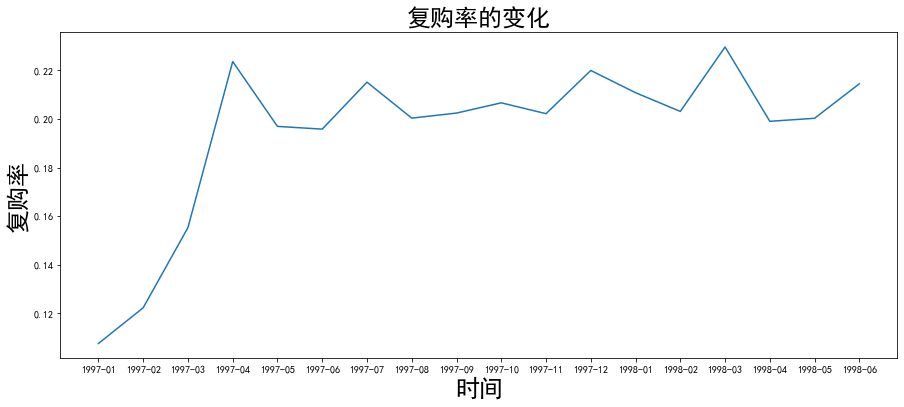

In [53]:
#count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
df_duplicate =pd.DataFrame(pivoted_df_transf.sum()/pivoted_df_transf.count()).reset_index()
df_duplicate.columns = ['Date', 'DuplicatedRate']
df_duplicate['Date'] = df_duplicate.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,6))
plt.plot(df_duplicate.Date, df_duplicate.DuplicatedRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('复购率',fontsize=24)
# plt.ylim(0,1)
plt.title('复购率的变化',fontsize=24)

说明：图上可以看出复购率在早期，因为大量新用户加入的关系，新客的复购率并不高，如1月新客们的复购率只有6%左右。而在后期，这时的用户都是大浪淘沙剩下的老客，复购率比较稳定，在20%左右。单看新客和老客，复购率有三倍左右的差距。

### 回购率
回购率：是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。比如，我1月消费用户1000，他们中有300个2月依然消费，回购率是30%。



In [54]:
#回购率
#每个用户每个月平均消费金额
pivoted_money=df.pivot_table(index='user_id',columns='month',values='order_amount',
                             aggfunc='mean').fillna(0)

columns_month=df['month'].sort_values().astype('str').unique()
pivoted_money.columns=columns_month
pivoted_money.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [55]:
#将有消费的记为1，没有消费的记为0
pivoted_purchase=pivoted_money.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [56]:
#如果本月进行消费，下月也进行消费，则记为1；如果下月没有消费，
# 则记为0，若本月没有记为消费，则记为nan
def purchase_return(data):
    status=[]
    for i in range(17):#循环17个月
        if data[i]==1:#若本月消费
            if data[i+1]==1:#下个月也消费
                status.append(1)#就记为1
            if data[i+1]==0:#下个月不消费，就记为0
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status, index=columns_month)

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)#axis=1表示计算方向在行的方向上，左右运算
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


In [57]:
df_purchase = (pivoted_purchase_return.sum() / pivoted_purchase_return.count()).reset_index()
df_purchase.columns = ['Date', 'PurchaseRate']
df_purchase['Date'] = df_purchase.Date.astype(str).apply(lambda x:x[:-3])

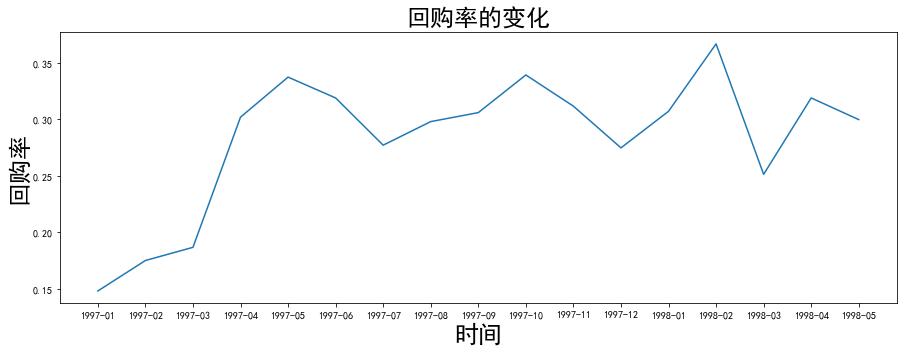

In [58]:
plt.figure(figsize = (15,5))
plt.plot(df_purchase.Date, df_purchase.PurchaseRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('回购率', fontsize=24)
plt.title('回购率的变化', fontsize=24);

+ 上图可以看出，在初期用户的回购率并不高，1月的回购率只有15%左右，4月份起回购率稳定在30%左右。

+ 从每月有回购消费的用户数数据可以看出，回购用户数整体有下降趋势。

+ 对回购率的分析，再次说明了对于新用户，在其第一次消费后的三个月内是一段重要的时期，需要营销策略积极引导其再次消费及持续消费。

+ 另外，对于有持续消费的老客，也要适时推出反馈老客户的优惠活动，以加强老客的忠诚度。

### 分析留存率(3,7,15,30,90,365天为周期)

留存率：它指用户在第一次消费后，有多少比率进行第二次消费。

消费日期 - 第一次消费日期 = 第二次消费与第一次消费的时间间隔 ，再将天数转化为数值

In [61]:
# 分析留存率
# 新建一个对象，并增加用户第一次消费时间的列，merge将两个dataframe合并
data_t=df[['user_id','purchase_date','order_num','order_amount']]
user_purchase_retention=pd.merge(left=data_t,
                                 right=orderdt_min.reset_index(),
                                 how='inner',
                                 on='user_id',
                                 suffixes=('','_min'))
user_purchase_retention.head(5)

,user_id,purchase_date,order_num,order_amount,purchase_date_min
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12
2,2,1997-01-12,5,77.00,1997-01-12
3,3,1997-01-02,2,20.76,1997-01-02
4,3,1997-03-30,2,20.76,1997-01-02


增加一列，表示订单日期与用户首次消费日期间的间隔时间

In [62]:
#每一次消费时间与第一次消费时间间隔
user_purchase_retention['order_date_diff']=user_purchase_retention['purchase_date']-user_purchase_retention['purchase_date_min']
#将timedelta转换为数值型
user_purchase_retention['date_diff']=user_purchase_retention.order_date_diff.apply(
    lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention.head(5)

,user_id,purchase_date,order_num,order_amount,purchase_date_min,order_date_diff,date_diff
0,1,1997-01-01,1,11.77,1997-01-01,0 days,0.0
1,2,1997-01-12,1,12.00,1997-01-12,0 days,0.0
2,2,1997-01-12,5,77.00,1997-01-12,0 days,0.0
3,3,1997-01-02,2,20.76,1997-01-02,0 days,0.0
4,3,1997-03-30,2,20.76,1997-01-02,87 days,87.0


将时间差值分桶处理：
分成0～3天内，3～7天内，7～15天……代表用户当前消费时间距第一次消费属于哪个时间段

In [63]:
#将时间间隔分桶（0-3）（3-7）等
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,
                                                bins=bin)
user_purchase_retention.head(10)

,user_id,purchase_date,order_num,order_amount,purchase_date_min,order_date_diff,date_diff,date_diff_bin
0,1,1997-01-01,1,11.77,1997-01-01,0 days,0.0,NaN
1,2,1997-01-12,1,12.00,1997-01-12,0 days,0.0,NaN
2,2,1997-01-12,5,77.00,1997-01-12,0 days,0.0,NaN
3,3,1997-01-02,2,20.76,1997-01-02,0 days,0.0,NaN
4,3,1997-03-30,2,20.76,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,1997-04-02,2,19.54,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,1997-11-15,5,57.45,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,1997-11-25,4,20.96,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,1998-05-28,1,16.99,1997-01-02,511 days,511.0,NaN
9,4,1997-01-01,2,29.33,1997-01-01,0 days,0.0,NaN


这里date_diff=0并没有被划分入0～3天，因为计算的是留存率，如果用户仅消费了一次，留存率应该是0。另外，如果用户第一天内消费了多次，但是往后没有消费，也算作留存率0。

pivot_table数据透视，Pandas函数pivot_table会默认删除含有空值的行，用dropna=False保持NaN的值。


In [64]:
#用户第一次消费之后，后续各时间段的消费总额
pivoted_retention=user_purchase_retention.pivot_table(index='user_id',
                                                      columns='date_diff_bin',
                                                      values='order_amount',
                                                      aggfunc=sum,
                                                      dropna=False)
pivoted_retention.head()

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,40.3,NaN,78.41
4,NaN,NaN,NaN,29.73,NaN,NaN,NaN,41.44
5,NaN,NaN,13.97,NaN,38.9,NaN,110.4,155.54


获得的结果是用户在第一次消费之后，在后续各时间段内的消费总额：

In [65]:
pivoted_retention.mean()#各时间段的平均消费额

date_diff_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

虽然后面时间段的金额高，但是它的时间范围也宽广。从平均效果看，用户第一次消费后的0～3天内，更可能消费更多。
依旧将数据转换成是否，1代表在该时间段内有后续消费，0代表没有：

In [69]:
#1代表有消费，0代表没有
pivoted_retention_trans=pivoted_retention.applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans

date_diff_bin,"(0, 3]","(3, 7]","(7, 15]","(15, 30]","(30, 60]","(60, 90]","(90, 180]","(180, 365]"
user_id,,,,,,,,
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1
4,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
23566,0,0,0,0,0,0,0,0
23567,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0


Text(0.5, 1.0, '留存率')

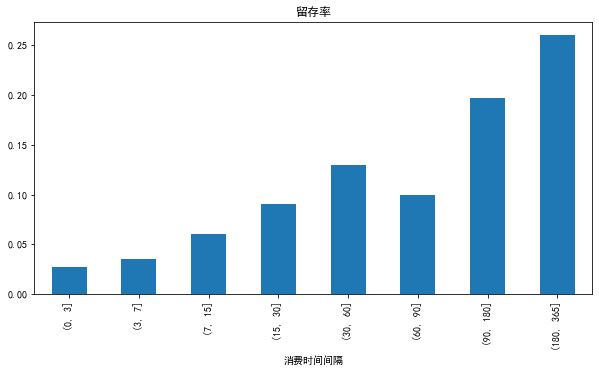

In [70]:
#每笔订单离第一笔订单的时间间隔
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize=(10,5))
plt.xlabel('消费时间间隔')
plt.title('留存率')

只有2.5%的用户在第一次消费的次日至3天内有过消费，3%的用户在3～7天内有过消费。数字并不好看，CD购买确实不是高频消费行为。有20%的用户在第一次消费后的三个月到半年之间有过购买，27%的用户在半年后至1年内有过购买。
从运营角度看，CD机营销在服务新用户的同时，应该注重用户忠诚度的培养，放长线掉大鱼，在一定时间内召回用户购买。

### 大客户的贡献率

因为消费行为有明显的二八倾向，想知道高质量用户为消费贡献了多少份额？



#### 用户销售额贡献情况：

按照用户id分组，对用户的消费金额进行累计求和 ，然后与总销售额比，得到比率，横坐标是用户的id。



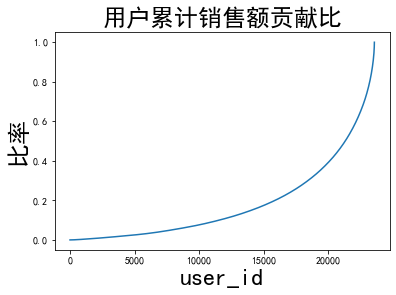

In [72]:
#先将用户消费金额按升序排列，逐行计算用户累计金额，最后一行是总消费金额
user_money=df.groupby('user_id')['order_amount'].sum().sort_values().reset_index()
user_money['money_cumsum']=user_money['order_amount'].cumsum()
money_total=user_money.money_cumsum.max()
#转行成百分比
user_money['prop']=user_money.apply(lambda x:x.money_cumsum/money_total,axis=1)#apply用在每个行上
user_money.tail()
user_money.prop.plot()
plt.xlabel('user_id', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计销售额贡献比', fontsize=24);

说明：前20000个用户，大约80%的用户贡献了40%的销售额，20%的用户贡献了60%的销售额

In [73]:
### 用户销量贡献情况

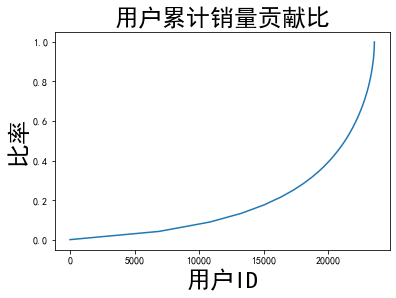

In [74]:
#先将用户销量按升序排列，逐行计算用户累计销量，最后一行是总销量
user_productsSum=df.groupby('user_id')['order_num'].sum().sort_values().reset_index()
user_productsSum['products_cumsum']=user_productsSum['order_num'].cumsum()
productsSum_total=user_productsSum.products_cumsum.max()
#转行成百分比
user_productsSum['prop']=user_productsSum.apply(lambda x:x.products_cumsum/productsSum_total,axis=1)#apply用在每个行上
user_productsSum.tail()
user_productsSum.prop.plot()
plt.xlabel('用户ID', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计销量贡献比', fontsize=24);

说明：跟销售额十分接近。

前20000名用户贡献了40%的消费，而后3500名用户贡献了60%的消费。符合二八趋势。也就是说我们只要维护了这3500个用户就可以把业绩KPI完成60%，如果能把3500个用户运营的更好就可以占比70%—80%之间。


### 结论

1.整体趋势：按年的月份趋势销量和销售额在1-3月份相对极高，然后骤降，原因应该与促销有关，但总体上呈现大幅下降趋势，应该要考虑市场变化、或者是客户需求的改变。

2.用户个体特征：大多数用户都是小金额批量购买，那么能否添加一些促销活动(如团购、满送、满减等)，促进客户销售

3.大部分用户的消费总额和购买总量都集中在低段，长尾分布，那能够构建用户画像，了解群体，针对群体性进行相应的促销活动或者是为CD赋予文娱元素。

4.用户的消费周期：有二次以上消费的用户，平均68天，所以在50天到60天期间，应该对这批用户进行刺激召回，细致点，比如10天回复满意度，30天发放优惠券，55天的时候提醒优惠券的使用。

5.用户的生命周期：有二次及以上消费的用户的平均生命周期是276天。用户的生命周期分别在20天内与400至500天间，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

6..新客户的复购率约为6%，老客户的复购率在20%左右；新客户的回购率在15%左右，老客户的回购率在30%左右，在这里，我们就需要进一步查看，为什么新客户的复购率会低，客户群体的原因？还是部分群体特征都存在这种情况，那么此时应该就要考虑我们产品了？是我们的产品不符合所有新客户期待吗？对于老客户的复购率，是否能够提高？老客户复购的产品是什么类型的？是否增加丰富度？等等。。这些探索都是为了理解我们的客户，为客户提供更多关怀，提高客户忠诚度。

7.用户质量：用户个体消费有一定规律性，大部分用户的消费集中在2000以下，用户消费反应了2/8法则，消费排名前20%的用户贡献了80%的消费额。所以说，狠抓高质量用户是万古不变的道理，这些高质量客户都是“会员”类型，需要专门为会员优化购物体验，比如专线接听、特殊优惠等等。而对于长尾客户，我们是不能放弃的，比如说，当前客户仅购买一种类别的音乐，那么能否让客户在我们这里购买其他类别的音乐产品。

8.留存率来看，一半的用户会流失，所以应该注重对用户的忠诚度的培养，比如打卡签到，积分制度，老用户打折制度会员升级制度。(从4的分析可知，注新客户流失率高，表明客户留存率低，那么应该对新客户的流失群体进行分析，探查为什们新客户会流失？而这方面的探查可以通过分析新客户的用户画像来进行探索，再明白新客户特征后，就需要提出相应的解决策略。如可能是因为产品并没有新客户群体所需的音乐种类，那么就通过增加音乐丰富度等措施来解决)